#Repeated Prisoner's Dilemma Game

Quick recall:
* Prisoner's dilemma game is a strategic form non zero-sum game
* The players choose not to co-operate, because that is the stable solution
* In the repeated game format, co-operation may emerge as a strategy due to the formation of reputation
* Trigger strategies that we will use are:
  * Tit-for-Tat (start with co-operation, but if the opponent defects, then you punish her by defecting for one step)
  * Grim (start with co-operation, but if the opponent defects, then you punish her by defecting always)
  * Random (randomly decide whether to co-operate or defect)

* We can try different combinations:
  * Random against random
  * Random against grim
  * Random against Tit-for-Tat
  * Tit-for-tat against Grim
  * Delayed Grim against Delayed Grim
  * Delayed Grim against Tit-for-Tat
  
* Both start with co-operation

## Symbols used

moves:
* 'C' - cooperate
* 'D' - defect

Payoff function takes moves of the two players a1 and a2 as arguments and returns payoff for the two players in one stage of the game

In [1]:
from random import randrange
from matplotlib import pyplot as plt

In [2]:
bothCoop = 20
defectGain = 100
defectLoss = -100
bothDefect = 0

numSteps = 100
maxLoss = -1000

In [3]:
def payoff(a1, a2):
  if a1 == 'C':
    if a2 == 'C':
      return (bothCoop, bothCoop)
    else:
      return (defectLoss, defectGain)
  else:
    if a2 == 'C':
      return (defectGain, defectLoss)
    else:
      return (bothDefect, bothDefect)



In [4]:
def tft(player, moves, step):
  a1,a2 = moves[-1]
  if player == 1:
    return a2
  else:
    return a1

In [5]:
def rand(player, moves, step):
  if randrange(2) == 0:
    return 'C'
  else:
    return 'D'

In [6]:
def grim(player, moves, step):
  if player == 1:
    oppIndex = 1
  else:
    oppIndex = 0

  a = [x[oppIndex] for x in moves]
  if 'D' in a:
    return 'D'
  else:
    return 'C'


In [7]:
def plot_payoffs(y1, y2, strat1, strat2):
  fig,ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(y1, linestyle = 'dotted', color='r')
  ax2.plot(y2, linestyle = 'dashed', color='b')
  ax1.set_xlabel('step')
  ax1.set_ylabel(strat1, color='r')
  ax2.set_ylabel(strat2, color='b')
  plt.show()

In [8]:
def print_actions(moves, strat1, strat2):
  a1 = [x[0] for x in moves]
  a2 = [x[1] for x in moves]
  print ("".join(a1), strat1)
  print ("".join(a2), strat2)

In [9]:
def run_game(strat1, strat2, label1, label2):
  ptot1 = 0
  ptot2 = 0
  y1 = []
  y2 = []

  moves = [('C','C')]

  for step in range(numSteps):
    p1a = strat1(1,moves,step)
    p2a = strat2(2,moves,step)
    p1, p2 = payoff(p1a, p2a)
    moves.append((p1a,p2a))
    ptot1 += p1
    ptot2 += p2

    y1.append(ptot1)
    y2.append(ptot2)


  print_actions(moves, label1, label2)
  plot_payoffs(y1,y2,label1,label2)

## First, let us try Random vs Random

CCDDCDDCDCCCDDCDDCDCDCDCCDDCDDDDCCCDDDDDCCDCCCCDDCCDCCDDDCDDCCDDCCDDCCDDDCDCDCCDCCCDCCCCDDDDCCCDCDCDC Random
CDDDDDCDDCCDDDCDDCCCDCCCDCCCCCCCDCDCDDCCDCCDDDDCCCDCCDDDCCDDDCCDDCDCCCCDDCDDCCDCDDDDCDCDCCDDCDCCDCCDD Random


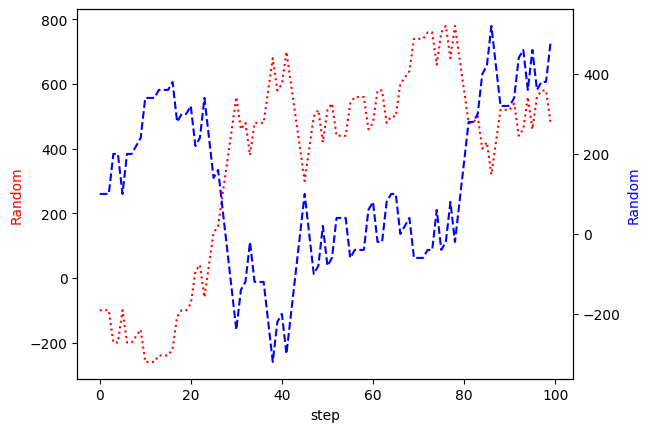

In [20]:
run_game(rand, rand, 'Random', 'Random')

## Now, let us try to change one of the players to Grim

CCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD Grim
CDDDDDDDDCCCCDDCCCDDDDDCCCDCCCCCDDCDCDCCDCDDCCCCCDDCDDDDDCCDCDDCDDDDCCDDDDCCCCCDDDCCDDCCDCDDCDCCCDCDC Random


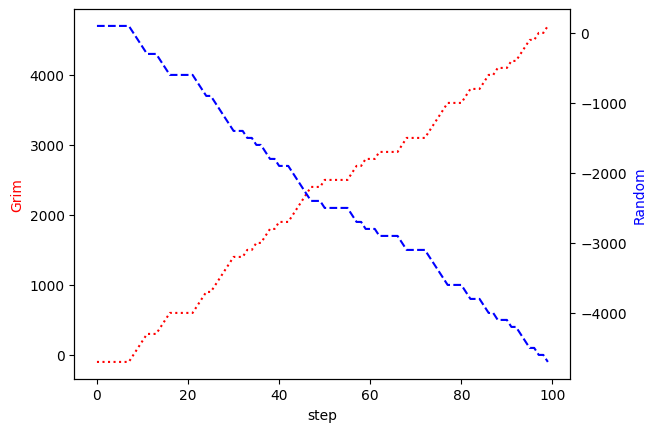

In [22]:
run_game(grim, rand, 'Grim', 'Random')

## Now let us try to make both players grim

CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC Grim
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC Grim


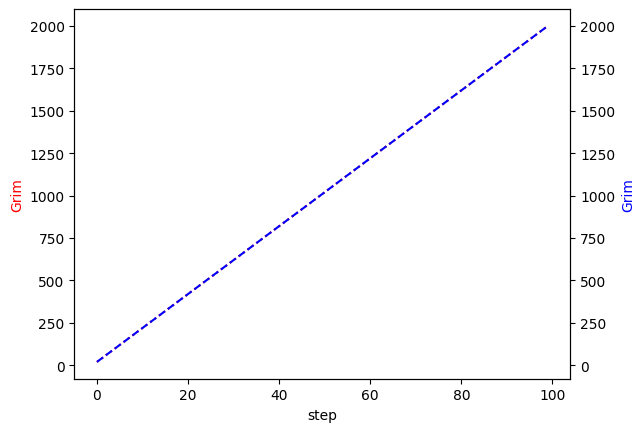

In [12]:
run_game(grim, grim, 'Grim', 'Grim')

That was not interesting !

## Let us delay the onset of grim a bit

In [13]:
delay = 10

In [14]:
def dgrim(player, moves, step):
  if step < delay:
    return rand(player,moves,step)
  else:
    return grim(player,moves,step)

CCDCDCCDDDCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD Delayed Grim
CCCDDDCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD Delayed Grim


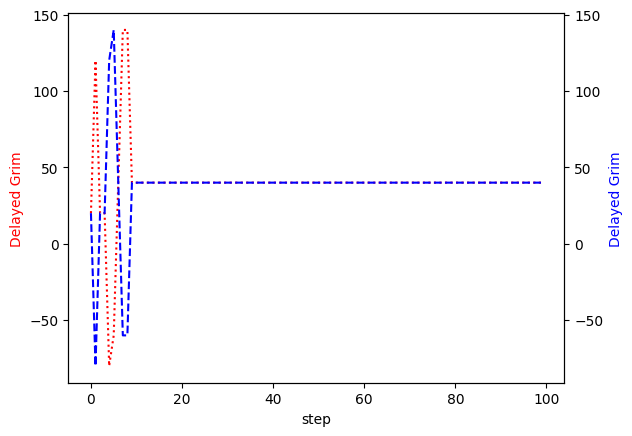

In [15]:
run_game(dgrim, dgrim, 'Delayed Grim', 'Delayed Grim')

## Now let us make one player TFT and the other Random

CDCDDDCDDDDDCCDCDCCDCCCDDDCDDDCCDDDCDCCDDCCDDCCCDDDCCCCDDCCCDCDCCDDDCCCCDCCDCCDDDCDCDCCCCCCDDCCCDCDCD Random
CCDCDDDCDDDDDCCDCDCCDCCCDDDCDDDCCDDDCDCCDDCCDDCCCDDDCCCCDDCCCDCDCCDDDCCCCDCCDCCDDDCDCDCCCCCCDDCCCDCDC TFT


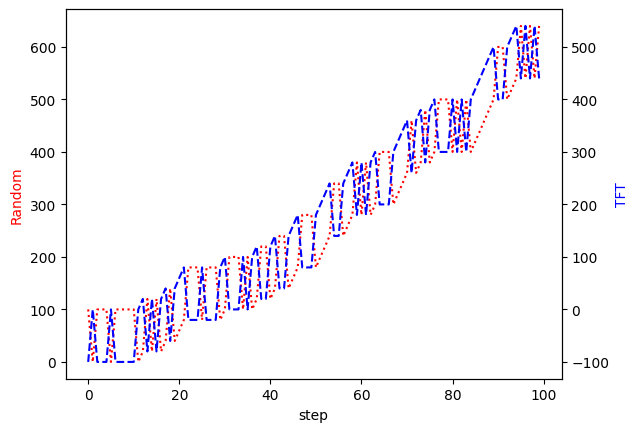

In [16]:
run_game(rand, tft, 'Random', 'TFT')

## Now let us try TFT against delayed Grim

CCDDCCDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD TFT
CDDCCDCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD Delayed Grim


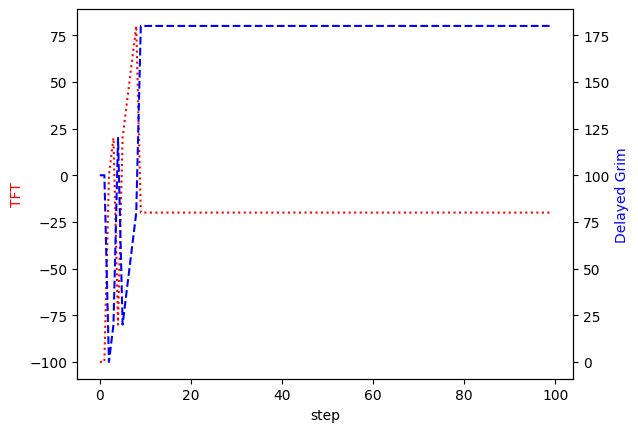

In [17]:
run_game(tft, dgrim, 'TFT', 'Delayed Grim')

## Finally, let us try TFT after a delay

In [18]:
def dtft(player, moves, step):
  if step < delay:
    return rand(player,moves,step)
  else:
    return tft(player,moves,step)

CDDCCDDDCCCCDDDDDCCCCCDDDDCDDDDDCCDDCDDDDCDDDDDDDCCDCDDCCDCDCCDDDCCCCCCDDDDCCCDCDDDCDDCDCDDCCCDDCCCDD Delayed TFT
CDCDCCDCCCCDDDDDCCCCCDDDDCDDDDDCCDDCDDDDCDDDDDDDCCDCDDCCDCDCCDDDCCCCCCDDDDCCCDCDDDCDDCDCDDCCCDDCCCDDD Random


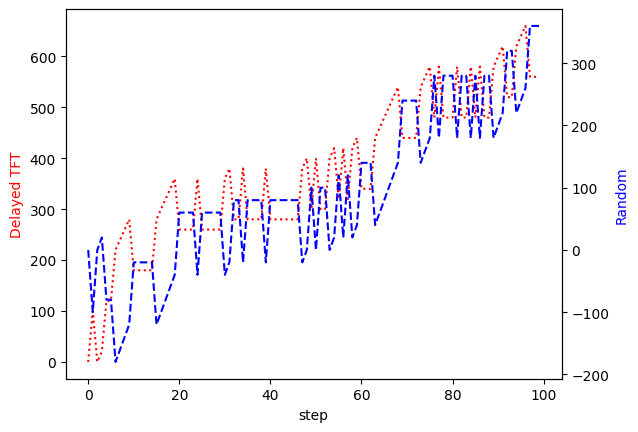

In [19]:
run_game(dtft, rand, 'Delayed TFT', 'Random')